# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Create lists to hold response info
city_name = []
country_code = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_name.append(city_weather['name'])
        country_code.append(city_weather['sys']['country'])
        lat.append(city_weather['coord']['lat'])
        lng.append(city_weather['coord']['lon'])
        max_temp.append(city_weather['main']['temp_max'])
        humidity.append(city_weather['main']['humidity'])
        cloudiness.append(city_weather['clouds']['all'])
        wind_speed.append(city_weather['wind']['speed'])
        date.append(city_weather['dt'])

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Print to logger
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nanao
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | woolgoolga
Processing Record 4 of Set 1 | waingapu
Processing Record 5 of Set 1 | port lincoln
Processing Record 6 of Set 1 | yagry
City not found. Skipping...
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | murzuq
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | sacramento
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | orchard homes
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | barreiras
Processing Record 16 of Set 1 | ta`u
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | champerico
Processing Record 19 of Set 1 | port mathurin
Processing Record 20 of Set 1 | waddan
Processing Record 21 of Set 1 | santo antonio
Processing Record 22 of Set 1 | gry

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({
    "City": city_name,
    "Country": country_code,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Date": date})

# Show Record Count
print(f"Number of records: {len(city_data_df)}")



Number of records: 593


In [7]:
# Display sample data
city_data_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Nanao,JP,37.0500,136.9667,22.85,92,100,1.91,1725294991
1,Waitangi,NZ,-43.9535,-176.5597,12.12,91,62,3.13,1725294992
2,Woolgoolga,AU,-30.1106,153.2007,17.93,45,0,9.02,1725294992
3,Waingapu,ID,-9.6567,120.2641,24.25,86,9,2.99,1725294992
4,Port Lincoln,AU,-34.7333,135.8667,10.30,73,0,1.69,1725294946


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,,
0,Nanao,JP,37.0500,136.9667,22.85,92,100,1.91,1725294991
1,Waitangi,NZ,-43.9535,-176.5597,12.12,91,62,3.13,1725294992
2,Woolgoolga,AU,-30.1106,153.2007,17.93,45,0,9.02,1725294992
3,Waingapu,ID,-9.6567,120.2641,24.25,86,9,2.99,1725294992
4,Port Lincoln,AU,-34.7333,135.8667,10.30,73,0,1.69,1725294946


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

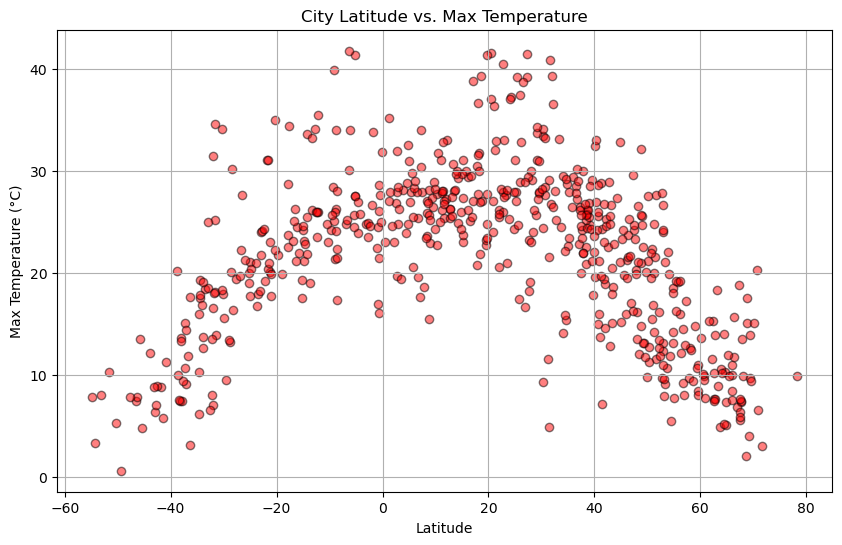

In [10]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], c="red", alpha=0.5, edgecolor="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Images/CityLatitude_vs_MaxTemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

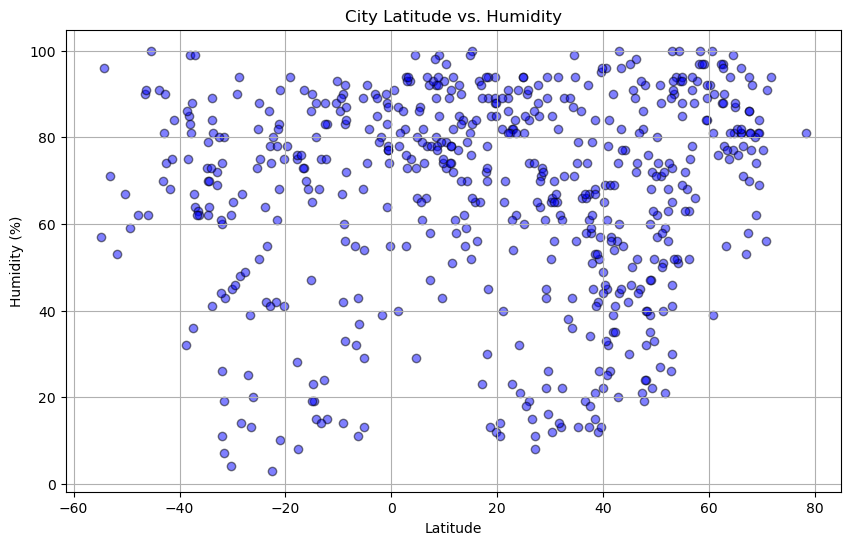

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], c="blue", alpha=0.5, edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Images/CityLatitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

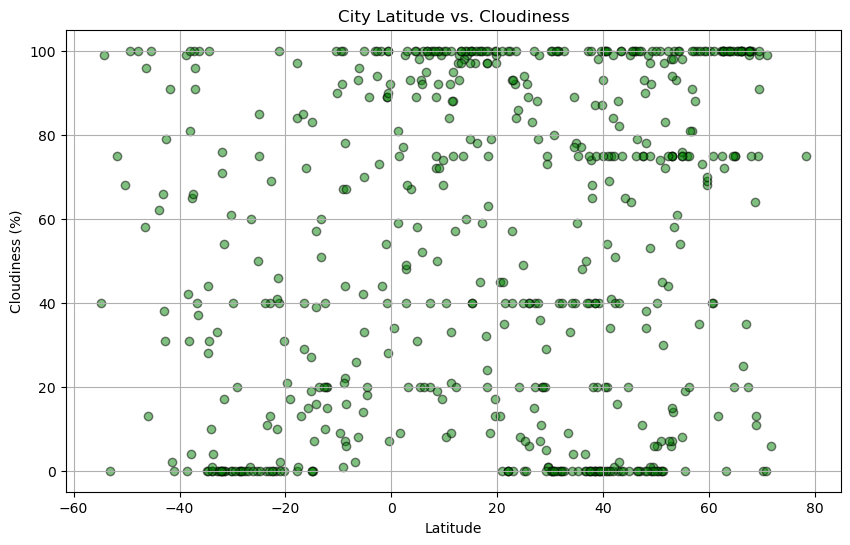

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], c="green", alpha=0.5, edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Images/CityLatitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

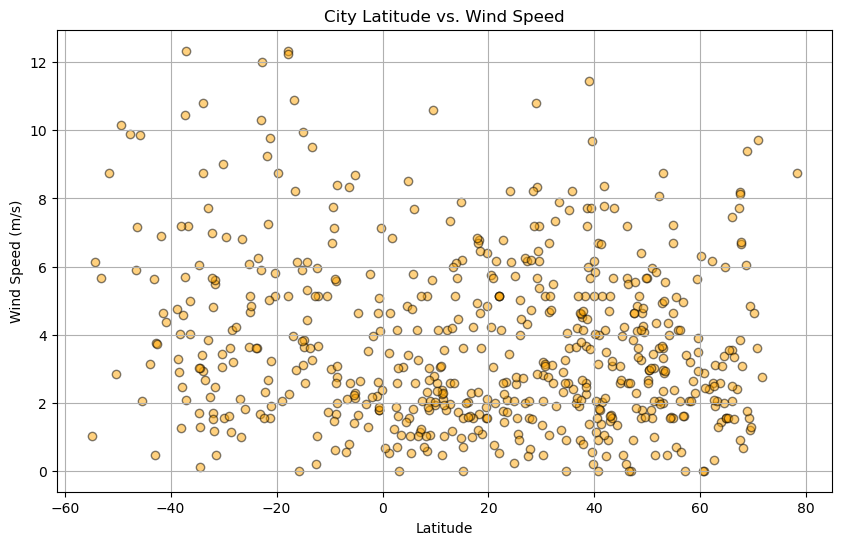

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], c="orange", alpha=0.5, edgecolor="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Images/CityLatitude_vs_WindSpeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label, hemisphere):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, c="blue", alpha=0.5, edgecolor="black")
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=12, color="red")
    plt.title(f"{title} - {hemisphere}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    # plt.show()
    
    print(f"{hemisphere} - Linear Regression:")
    print(f"The r-value is: {r_value:.2f}")
    print(f"The r-squared value is: {r_value**2:.2f}")
    print(f"The p-value is: {p_value:.2f}")
    print("-----------------------------")

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,,
0,Nanao,JP,37.0500,136.9667,22.85,92,100,1.91,1725294991
6,George Town,MY,5.4112,100.3354,27.96,87,20,0.51,1725294797
7,Murzuk,LY,25.9155,13.9184,37.41,19,6,5.03,1725294993
9,Sacramento,US,38.4666,-121.3177,20.90,68,0,2.24,1725294610
11,Orchard Homes,US,46.8633,-114.0484,17.08,45,0,0.00,1725294984


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,,
1,Waitangi,NZ,-43.9535,-176.5597,12.12,91,62,3.13,1725294992
2,Woolgoolga,AU,-30.1106,153.2007,17.93,45,0,9.02,1725294992
3,Waingapu,ID,-9.6567,120.2641,24.25,86,9,2.99,1725294992
4,Port Lincoln,AU,-34.7333,135.8667,10.30,73,0,1.69,1725294946
5,Blackmans Bay,AU,-43.0167,147.3167,6.40,81,38,0.45,1725294993


###  Temperature vs. Latitude Linear Regression Plot

(0, 0) - Linear Regression:
The r-value is: -0.69
The r-squared value is: 0.47
The p-value is: 0.00
-----------------------------


<Figure size 800x600 with 0 Axes>

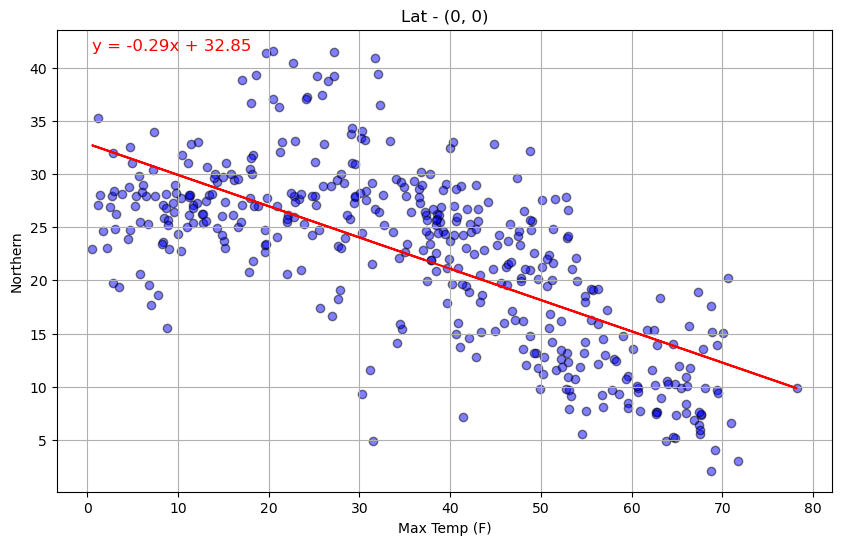

In [17]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
plt.figure(figsize=(8, 6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, "Lat", "Max Temp (F)", "Northern",(0, 0))
plt.savefig("output_data/Images/max_temp_vs_latitude_northern_hemisphere.png")
plt.show()
# Close the plot
plt.close()


Southern Hemisphere - Linear Regression:
The r-value is: 0.74
The r-squared value is: 0.55
The p-value is: 0.00
-----------------------------


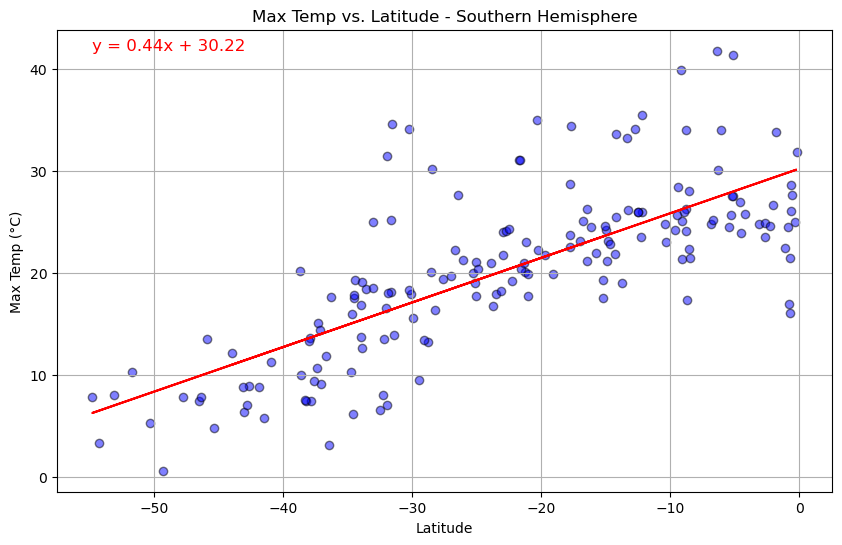

In [19]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Max Temp vs. Latitude", "Latitude", "Max Temp (°C)", "Southern Hemisphere")

plt.savefig("output_data/Images/max_temp_vs_latitude_southern_hemisphere.jpeg", bbox_inches='tight')

plt.show()



**Discussion about the linear relationship:** As max temp. increases, latitude decreases, this shows that they have an inverely proportional relationship. 

### Humidity vs. Latitude Linear Regression Plot

Northern Hemisphere - Linear Regression:
The r-value is: -0.01
The r-squared value is: 0.00
The p-value is: 0.77
-----------------------------


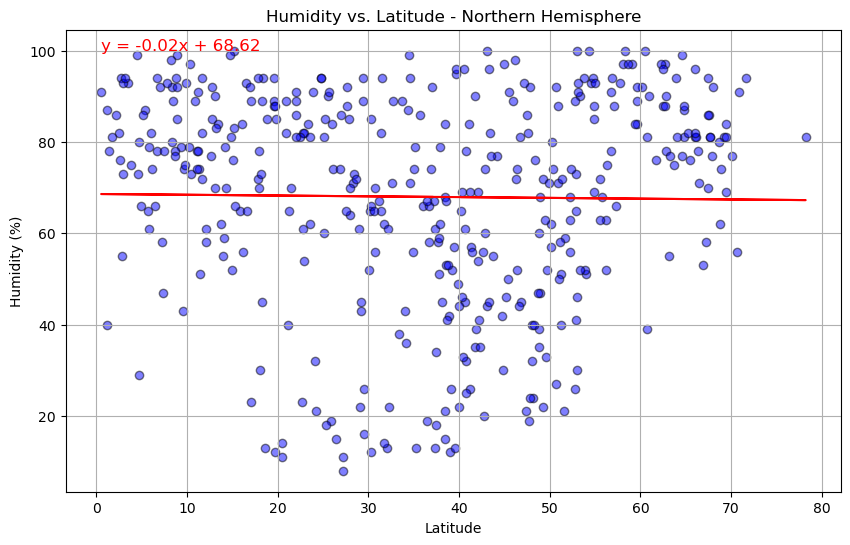

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Humidity vs. Latitude", "Latitude", "Humidity (%)", "Northern Hemisphere")

# Save the figure
plt.savefig("output_data/Images/Northern_Hemisphere_humididty.jpeg")
plt.show()



Southern Hemisphere - Linear Regression:
The r-value is: -0.04
The r-squared value is: 0.00
The p-value is: 0.58
-----------------------------


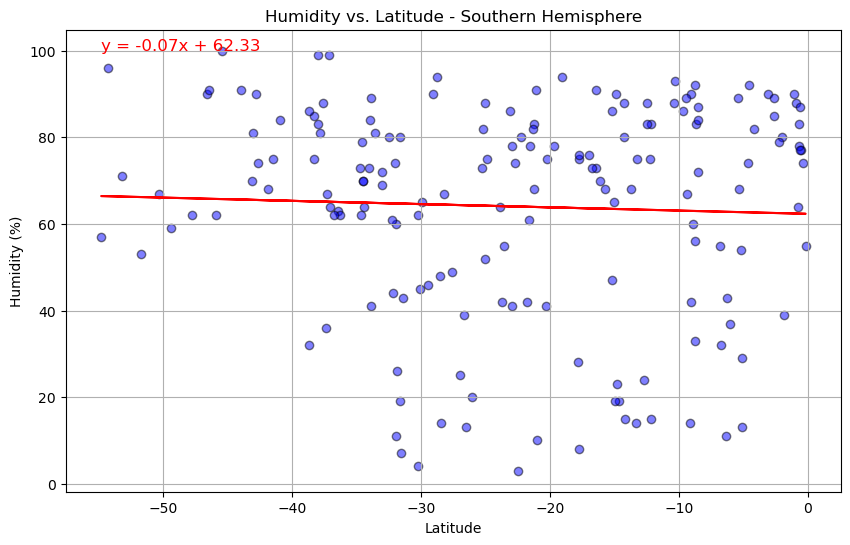

In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Humidity vs. Latitude", "Latitude", "Humidity (%)", "Southern Hemisphere")

# Save the figure
plt.savefig("output_data/Images/Southern_Hemisphere_Humidiity.jpeg")


plt.show()

**Discussion about the linear relationship:** Humidity % and latitude have a directly proportional relationship. They both decrease together. However the data has too many outliers for it to be a true and accurate relationship

### Cloudiness vs. Latitude Linear Regression Plot

Northern Hemisphere - Linear Regression:
The r-value is: -0.01
The r-squared value is: 0.00
The p-value is: 0.76
-----------------------------


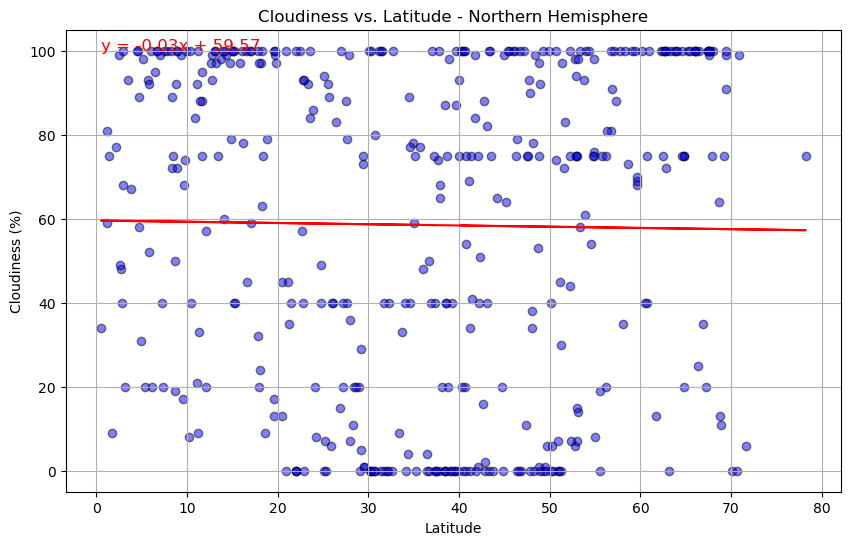

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)", "Northern Hemisphere")

# Save the figure
plt.savefig("output_data/Images/Northern_Hemisphere_cloudiness.jpeg")
plt.show()


Southern Hemisphere - Linear Regression:
The r-value is: 0.07
The r-squared value is: 0.01
The p-value is: 0.34
-----------------------------


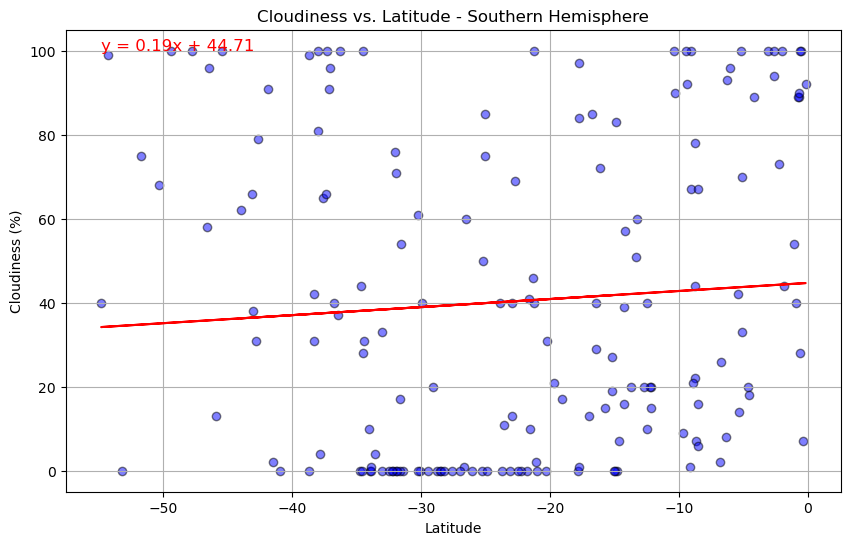

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)", "Southern Hemisphere")


# Save the figure
plt.savefig("output_data/Images/Southern_Hemisphere_cloudness.jpeg")
plt.show()


**Discussion about the linear relationship:** Cloud % and latitude have a directly decreasing proportional relationship, however there are many points above and below the line. There are too many outliers 

### Wind Speed vs. Latitude Linear Regression Plot

Northern Hemisphere - Linear Regression:
The r-value is: 0.07
The r-squared value is: 0.00
The p-value is: 0.16
-----------------------------


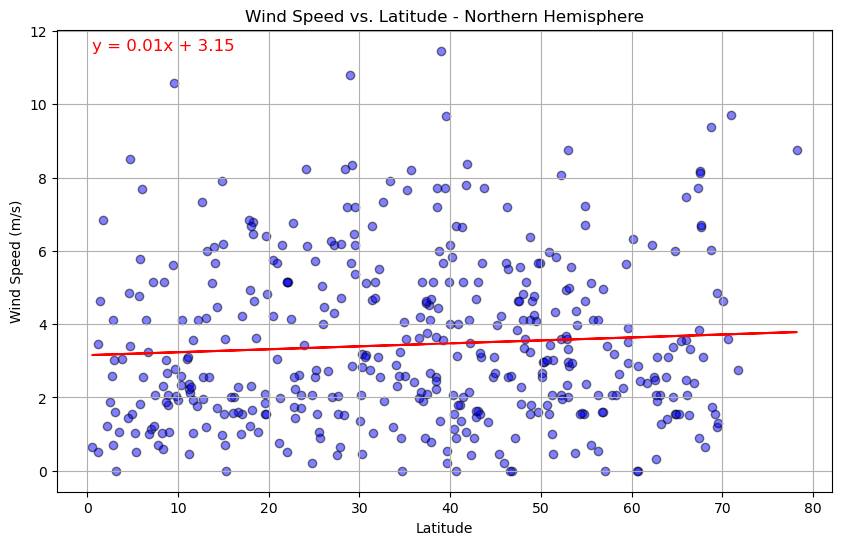

In [24]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)", "Northern Hemisphere")


# Save the figure
plt.savefig("output_data/Images/Northern_Hemisphere_windspeed.jpeg")

plt.show()


Southern Hemisphere - Linear Regression:
The r-value is: -0.16
The r-squared value is: 0.02
The p-value is: 0.04
-----------------------------


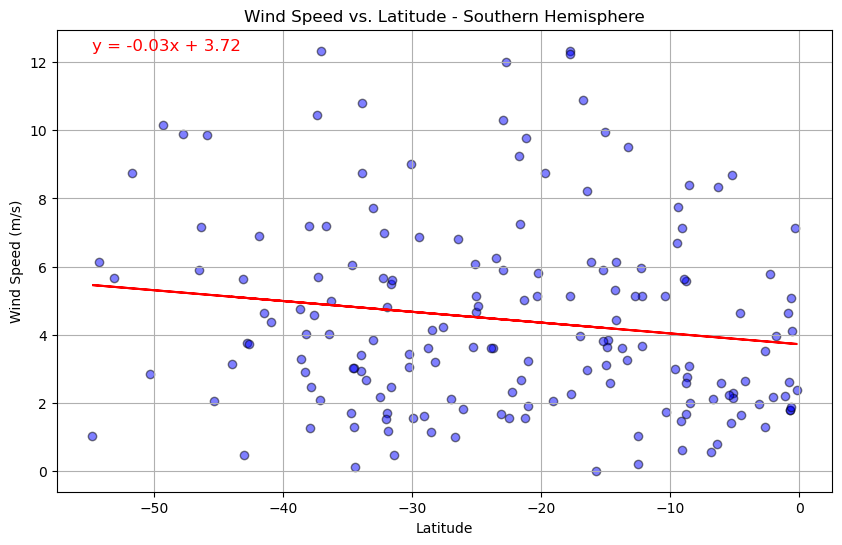

In [25]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)", "Southern Hemisphere")

# Save the figure
plt.savefig("output_data/Images/Southern_Hemisphere_windspeed.jpeg")
plt.show()


**Discussion about the linear relationship:** on average wind speed stays under 4m/s however, as latitude decreases wind speed decreases. They have a directly proportional relationship.  